# **AIM: Implementing Time Series Stock Price Prediction with LSTM and yfinance in Python**

In [ ]:
import yfinance as yf  #This library is used to download historical stock data from Yahoo Finance.
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Flatten

stock: Specifies the stock symbol for which historical data is to be downloaded (in this case, 'AAPL' for Apple).

start_date and end_date: Define the date range for which historical stock data is to be retrieved.

yf.download(): Fetches historical stock data using Yahoo Finance API.

In [ ]:
stock = 'AAPL'
start_date = '2019-04-11'
end_date = '2024-04-11'

data = yf.download(stock,start = start_date,end = end_date)
df = pd.DataFrame(data)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-11,50.212502,50.250000,49.610001,49.737499,47.882244,83603200
2019-04-12,49.799999,50.035000,49.052502,49.717499,47.862988,111042800
2019-04-15,49.645000,49.962502,49.502499,49.807499,47.949627,70146400
2019-04-16,49.865002,50.342499,49.639999,49.812500,47.954437,102785600
2019-04-17,49.884998,50.845001,49.652500,50.782501,48.888248,115627200


In [ ]:
df.shape

(1258, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-04-11 to 2024-04-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [ ]:
closed_price = df[['Close']]
print(closed_price)

                 Close
Date                  
2019-04-11   49.737499
2019-04-12   49.717499
2019-04-15   49.807499
2019-04-16   49.812500
2019-04-17   50.782501
...                ...
2024-04-04  168.820007
2024-04-05  169.580002
2024-04-08  168.449997
2024-04-09  169.669998
2024-04-10  167.779999

[1258 rows x 1 columns]


In [ ]:
scaler = MinMaxScaler()
train = closed_price.iloc[:400]
test = closed_price.iloc[400:501]


In [ ]:
scaler.fit(train)


MinMaxScaler()

In [ ]:
scaler_train = scaler.transform(train)
scaler_test = scaler.transform(test)
print(scaler_train)
# print(scaler_test)

[[0.07057948]
 [0.07035935]
 [0.07134994]
 [0.07140498]
 [0.08208135]
 [0.08409003]
 [0.08593363]
 [0.09405095]
 [0.09317045]
 [0.08799735]
 [0.08530076]
 [0.08615376]
 [0.0753123 ]
 [0.10241595]
 [0.09864618]
 [0.10580045]
 [0.09680259]
 [0.0813384 ]
 [0.08144844]
 [0.07544989]
 [0.06570907]
 [0.03417533]
 [0.04226515]
 [0.04848384]
 [0.04617247]
 [0.0432007 ]
 [0.02693851]
 [0.03659679]
 [0.02608551]
 [0.01750042]
 [0.01560178]
 [0.01356555]
 [0.01122669]
 [0.01375819]
 [0.00487041]
 [0.        ]
 [0.01744537]
 [0.0254251 ]
 [0.03279951]
 [0.04636507]
 [0.05305157]
 [0.05918771]
 [0.05748171]
 [0.05737162]
 [0.05349184]
 [0.05665621]
 [0.06920367]
 [0.06760771]
 [0.07198285]
 [0.07011171]
 [0.06956139]
 [0.06127898]
 [0.07291839]
 [0.0727533 ]
 [0.0677453 ]
 [0.07773376]
 [0.08098067]
 [0.08560344]
 [0.08510813]
 [0.07352376]
 [0.07688076]
 [0.08235649]
 [0.07828408]
 [0.08254912]
 [0.08780476]
 [0.08585108]
 [0.08268671]
 [0.08904299]
 [0.08059544]
 [0.09333554]
 [0.09779318]
 [0.09

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 3
n_feature = 1
generator = TimeseriesGenerator(scaler_train,scaler_train,length = n_input,batch_size = 1 )

In [ ]:
print(generator[0])

(array([[[0.07057948],
        [0.07035935],
        [0.07134994]]]), array([[0.07140498]]))


In [ ]:
X,y=generator[0]
X=X.flatten()
print(X)
print(y)

[0.07057948 0.07035935 0.07134994]
[[0.07140498]]


In [ ]:
print(scaler_train[0:4])

[[0.07057948]
 [0.07035935]
 [0.07134994]
 [0.07140498]]


In [ ]:
model = Sequential()
model.add(LSTM(30,input_shape = (n_input,n_feature)))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 30)                3840      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit_generator(generator,epochs = 5)

Epoch 1/5


<ipython-input-56-b5640342f504>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs = 5)


397/397 [==============================] - 4s 4ms/step - loss: 0.0230
Epoch 2/5
397/397 [==============================] - 2s 4ms/step - loss: 0.0012
Epoch 3/5
397/397 [==============================] - 2s 5ms/step - loss: 0.0011
Epoch 4/5
397/397 [==============================] - 2s 4ms/step - loss: 0.0011
Epoch 5/5
397/397 [==============================] - 2s 4ms/step - loss: 9.4572e-04


In [ ]:
model.history.history.keys()

dict_keys(['loss'])

In [ ]:
import matplotlib.pyplot as plt


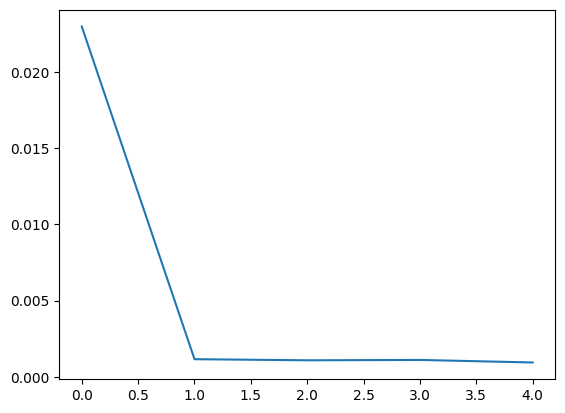

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
first_eval_batch = scaler_train[-3:]

In [ ]:
first_eval_batch

array([[0.83325084],
       [0.82950865],
       [0.8034231 ]])

In [ ]:
first_eval_batch = first_eval_batch.reshape((1,n_input,n_feature))

In [ ]:
first_eval_batch

array([[[0.83325084],
        [0.82950865],
        [0.8034231 ]]])

In [ ]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 21ms/step


array([[0.819756]], dtype=float32)

In [ ]:
scaler_test[0]

array([0.79957082])